In [40]:
from itertools import combinations
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [41]:
## Here are categories that just have one member, is not suited for pw jaccard, merged them with others below and Rerun for "Other"
# Define the categories
gc_ms_groups = {
    "Sugars_Carbohydrates": [
        "Cellobiose_361_204_rt14_40", 
        "raffinose_437_451_rt16_91", 
        "glucose_160_rt9_81", 
        "inositol_myo_305_265_rt10_71", 
        "sucrose_437_361_rt13_77", 
        "hexose_307_217_rt9_58", 
        "glucose_1_phosphate_217_rt9_16", 
        "trehalose_alpha_alpha_191_169_", 
        "fructose_307_217_rt9_48", 
        "glucose_160_319_rt9_68", 
        "galactinol_204_191_rt15_38", 
        "Ribulose_5_phosphate_357_299_1", 
        "glucose_6_phosphate_160_387_rt", 
        "Cellobiose_361_204_or_maltose_", 
        "_6_phospho_gluconate"
    ],
    "Amino_Acids_and_Derivatives": [
        "tyrosine_218_280_rt10_78",
        "serine_204_218_rt5_84", 
        "isoleucin_158_233_rt_5_21", 
        "asparagine_116_188_rt9_00", 
        "ornithine_142_174_rt9_34", 
        "alanine_3_cyano_141_100_rt6_78",
        "arginine_157_256_rt9_92", 
        "threonine_219_291_rt6_01", 
        "tryptophan_202_291_rt12_94", 
        "alanine_116_218_rt3_38", 
        "leucine_158_232_rt4_97", 
        "valine_144_218_rt4_42", 
        "asparagine_188_216_rt7_84", 
        "methionine_176_128_rt7_76", 
        "asparagine_188_216_rt7_45", 
        "lysine_156_174_rt10_07", 
        "glycine_102_147_rt3_70", 
        "aspartic_acid_232_218_rt7_48", 
        "histidine_154_254_rt11_10", 
        "glutamine_156_245_rt9_80", 
        "glycine_174_248_rt_5_31", 
        "homoserine_218_128_rt6_64", 
        "proline_142_130_rt_5_53", 
        "alanine_beta_248_290_rt6_44", 
        "ornithine_142_348_rt8_03"
    ],
    "Nucleotides_and_Derivatives": [
        "adenine_264_279_rt11_12", 
        "adenosine_5_monophosphate_169_"
    ],
    "Organic_Acids": [
        "threonic_acid_292_220_rt7_49", 
        "citric_acid_273_375_rt9_72", 
        "quinic_acid_255_345_rt9_45", 
        "Oxalic_acid_219_147_3_94", 
        "dehydroascorbic_acid_316_173_r", 
        "erythronic_acid_292_rt7_24", 
        "pyroglutamic_acid_156_258_rt8_", 
        "nonanoic_acid_117_215_rt6_19", 
        "malic_acid_233_245_rt7_22", 
        "glyceric_acid_292_189_rt5_63", 
        "butyric_acid_4_amino_174_304_r", 
        "quinic_acid_3_caffeoyl_trans_3", 
        "galactonic_acid_1_4_lacton_217"
    ],
    "Amines_Amides": [
        "dopamine_174_426_rt11_11", 
        "ethanolamine_174_rt4_63", 
        "guanidine_146_171_rt4_33"
    ],
    "Vitamins_and_Cofactors": [
        "nicotinic_acid_180_136_rt6_32", 
        "pantethaine_4_03_220_235"
    ],
   "Others_merged": [
        "phosphoric_acid_314_299_rt_5_4",
        "glycerol_117_205_rt4_75",
        "pyridine_2_hydroxy_152_167_rt3", 
        "inositol_1_phosphate_myo_299_3", 
        "urea_189_204_rt5_56", 
        "glycerol_3_phosphate_357_445_r", 
        "Hydroxylamine_133_3_07_No_need", 
        "glutamic_acid_246_363_rt8_31",
        "beta_Sitosterol_1TMS_129_18_44"
    ]
}
#lcms_cat = {
#    "lcms": []
#}
#lcms_cat['lcms'] = list(lcms_orph.keys())
## Here are categories that just have one member, is not suited for pw jaccard, merged them with others below and Rerun for "Other"

lc_ms_groups = {
    "Amino_Acids_and_Derivatives": [
        "Argininosuccinic_acid_L", "Aspartyphenylalanine_1_L", "gamma_Glutamylisoleucine_", 
        "gamma_Glutamylvaline_", "Glycyl_L_phenylalanine_L", "Histidine_L", 
        "L_gamma_glutamyl_L_isoleucine", "N_gamma_L_Glutamyl_L_methionin", "Phenylalanylglutamic_acid_", 
        "Prolylglycine_L", "Prolyphenylalanine_or_Leucymet", "Tyrosine_L", "Kynurenine_free_base_L", "N_Decanoylglycine_",
        "Phenylalanyaspartatic_acid_L"
    ],
    "Quinic_Acid_Derivatives": [
        "_3_5_dicaffeoul_quinic_acid_L", "_1_3_Dicaffeoylquinic_acid_", "_4_O_p_Coumaroylquinic_acid_", 
        "_4_5_Di_O_caffeoylquinic_acid_", "Coumaroyl_quinic_acid_", "Caffeoylshikimic_acid_L","Quinic_acid_161_05_", 
        "Quinic_acid_derivative_3_56", "Quinic_acid_derivative_with_he"
    ],
    "Phenolic_Compounds": [
        "Caffeic_acid_1_L", "Caffeic_acid_glucoside_L", "Caffeoylglucarate_L", 
        "Chlorogenic_acid_", "Conduritol_B_Epoxide_L", "Dehydro_Ascorbic_acid_L", "Ferulic_acid_4_O_glucuronide_L", 
        "Feruloyl_di_glucoside_L", "Feruloylglucose_L", "Flavonoid_glycoside_", "Galloylglucose_L", 
        "Gentesic_acid_glucoside_L", "Kaempferol_3_O_glucoside_7_O_r", "Kaempferol_3_O_rhamnoside_7_O_", 
        "Kaempferol_3_O_rutinoside_", "Kaempferol_7_3G_glucosylgentio", "Kaempferol_7_O_Glucoside_1_L", 
        "Kaempferol_glucose_xylose_L", "Kaempferol_rhamnose_glucose", "Naringenin_chalcone_L", "p_coumaroyl_di_glucoside_L", 
        "p_coumaroyl_glucoside_L", "Phenolic_glycoside_", "Quercetin_3_7_di_glucoside_", "Quercetin_3_glucoside_3", 
        "Quercetin_7_4_O_diglucoside_", "Quercetin_glc_glc_rha", "Quercetin_glucose_glucose_rham", 
        "Quercetin_glucose", "Quercetin_glucose_xylose", "Quercitin_3_7_diglucoside_6_rh", "Quercitin_3_O_Glucoside_2_L", 
        "Resveratrol_3_4_diglucoside_L", "Sinapoylglucose_2_L", "Sinapoylglucose_L","Catechol_", "_5_Chlorogenic_acid", "chlorgenic_acid_L", 
        "hydroxyjasmonic_acid_glucoside", "Hydroxy_jasmonic_acid_glucosid"
    ],
    "Sugars_and_Sugar_Derivatives": [
        "alpha_D_Galacturonic_acid_1_ph", "alpha_L_Fucose_1_Phosphate", "Dihydrophaseic_acid_glucoside_", 
        "Dihydroxyacetone_phosphate_L", "Fructose_1_6_biosphasphate_L", "Glucaric_acid_1_4_lactone_L", 
        "Gluconic_acid_lactone_L", "Gluconic_acid_L", "Glutamic_acid_L", "Inosine_L", "Isorhamnetin_3_O_glucoside_L", 
        "Isorhamnetin_3_O_rutinoside", "Lactobionic_acid_L", "Maltotriose_", "naringenin_7_O_glucoside_1_L", 
        "naringenin_7_O_glucoside_3_L", "Pantothenic_acid_L", "Phaseoloidin", 
        "Pyroglutamic_acid_3_L", "Ribulose_5_phosphate_L", "Tartaric_acid_L", "Trehalose", 
        "Trehalose_phenolic_acid_", "Vanilloloside", "Vanilloside_L", "Zeatin_glucoside_L", "_1_O_Feruloyl_glucose_L"
    ],
    "Nucleotides_and_Derivatives": [
        "_5_Deoxy_5_Methylthioadenosine", "Guanosine_", "Nicotinamide_adenine_dinucleot", 
        "Oxidized_glutathione_",
    ],
    "Terpenes_and_Triterpenes": [
        "Diterpene_8_2", "Terpene_10_26", "Terpene_9_53", "Triterpene_10_43", "Triterpene_10_78", 
        "Triterpene_8_14", "Triterpene_8_21", "Triterpene_9_79"
    ],
    "Saponins": [
        "Saponin_10_182", "Saponin_10_183", "Saponin_10_264", "Saponin_10_47", "Saponin_10_56", 
        "Saponin_10_67780171", "Saponin_10_72", "Saponin_8_02", "Saponin_8_42", "Saponin_8_83", 
        "Saponin_8_8", "Saponin_9_18", "Saponin_9_88", "Soyasaponin_A2_L"
    ],
    "Other_merged": [
            "_10_Formyltetrahydrofolate_L", "_3_Deoxy_D_manno_2_octulosonic", "_5_hydroxy_Ferulic_acid_Glucos2", 
            "_5_hydroxy_ferulic_acid_glucos", "_6_phosphogluconic_acid_L", "_7_Epi_12_hydroxyjasmonic_acid", 
            "_D_Glycero_alpha_D_Manno_Hepto", "_R_2_Phenylglycin", "Azelaic_acid_L", "Azukisaponin_VI_1_L", 
            "CGA_hexose_", "Urocanic_acid_L","_Rutin", "porphobilinogen_2_L"
    ],
    "unidentified": [
        "_1021_486521_9_141280832",
        "_1021_48667462_9_66538870707",
        "_1063_497231_10_58247297",
        "_1063_529871_9_415000766",
        "_1141_528589_8_043846139",
        "_1151_551493_10_40677464",
        "_1165_527084_8_995631942",
        "_1183_537778_8_600427106",
        "_1183_538043_8_673358308",
        "_1191_542641_10_3213884",
        "_1209_556345_10_14653119",
        "_1241_580464_8_916526509",
        "_1253_57885907_8_99579782362",
        "_1283_593009_9_259004534",
        "_1283_593348_9_160768845",
        "_1313_601235_9_01121774",
        "_303_0720727_3_335904942",
        "_312_0943959_2_614228811",
        "_351_1294837_5_809380415",
        "_366_9939681_1_170199352",
        "_374_1568694_3_674168475",
        "_380_1288743_6_36896135",
        "_427_1824019_5_95992104",
        "_429_1765684_7_873841266",
        "_441_1978503_6_218123415",
        "_475_1821542_6_560220101",
        "_487_2029578_5_338775921",
        "_496_1502126_3_792994891",
        "_512_1445532_3_132648409",
        "_523_1663837_5_238225973",
        "_531_2448764_7_209307815",
        "_567_2828405_6_133036019",
        "_641_171822_6_885700966",
        "_658_1575839_4_528042834",
        "_671_2775803_7_254060113",
        "_821_3258533_9_228249892",
        "_857_418157679_9_32212355859",
        "_857_418693067_9_24167206032",
        "_931_4518066_8_63280459",
        "_933_4699157_8_265868462",
        "_947_486080952_9_72692719903",
        "_963_4798371_8_624190173",
        "_987_4809544_10_24318525"
    ]
}


In [42]:

def pw_jaccard_index(input_data, plot=True, plot_values=False, summary_stats=False):
    if isinstance(input_data, str):
        try:
            df = pd.read_csv(input_data, index_col=0)
        except FileNotFoundError as e:
            print(f"Error: The file at {input_data} was not found.")
            return
        except Exception as e:
            print(f"An error occurred while trying to read {input_data}: {e}")
            return
    elif isinstance(input_data, pd.DataFrame):
        df = input_data
    else:
        print("Input must be a pandas DataFrame or a path to a CSV file.")
        return

    # create sets of enriched GO IDs for each metabolite
    enrichment_sets = {col: set(df.index[df[col] == 1]) for col in df.columns}

    #  Jaccard Index for each pair of metabolites
    jaccard_indices = {}
    for metabolite1, metabolite2 in combinations(enrichment_sets.keys(), 2):
        intersection = enrichment_sets[metabolite1].intersection(enrichment_sets[metabolite2])
        union = enrichment_sets[metabolite1].union(enrichment_sets[metabolite2])
        jaccard_index = len(intersection) / len(union)
        jaccard_indices[(metabolite1, metabolite2)] = jaccard_index

    if plot:
        metabolites = list(set([met for pair in jaccard_indices.keys() for met in pair]))
        jaccard_matrix = pd.DataFrame(index=metabolites, columns=metabolites, data=1)

        # populate the DataFrame with jacc indices
        for (met1, met2), index in jaccard_indices.items():
            jaccard_matrix.at[met1, met2] = index
            jaccard_matrix.at[met2, met1] = index  # for symmetry, as Jaccard index is a symmetric measure

        # heatmap
        plt.figure(figsize=(20, 16))  # Adjust size as needed
        sns.heatmap(jaccard_matrix, annot=plot_values, cmap='crest')  # 'annot=False' to not show the values in the cells
        #plt.title("Jaccard Index Heatmap")
        plt.show()
        #  summary statistics 
    if summary_stats:
        values = list(jaccard_indices.values())
        qs = np.percentile(values, [25, 50, 75])
        q25, q50, q75 = qs  

        summary = {
            "mean": np.mean(values),
            "median": np.median(values),
            "std_dev": np.std(values),
            "min": np.min(values),
            "max": np.max(values),
            "q25": q25,
            "q50": q50,
            "q75": q75
        }
        
        #  print the summary
        #for key, value in summary.items():
        #    print(f"{key}: {value}")
        
        # Return indices and summary if summary_stats is True
        return jaccard_indices, summary
    return jaccard_indices

def generate_heatmap(jaccard_indices, ax, plot_values=False):
    metabolites = list(set([met for pair in jaccard_indices.keys() for met in pair]))
    jaccard_matrix = pd.DataFrame(index=metabolites, columns=metabolites, data=1)

    for (met1, met2), index in jaccard_indices.items():
        jaccard_matrix.at[met1, met2] = index
        jaccard_matrix.at[met2, met1] = index

    sns.heatmap(jaccard_matrix, annot=plot_values, cmap='crest', ax=ax, cbar=False)



## Testing

>Kolgomorov Smirnov Test (non-parametric, does not assume normal distribution)
- considers the entire distribution shape
- testing: whether there are significant differences in the overall distribution of Jaccard indices within groups versus between groups
- K-S test can be sensitive to sample size: large sample sizes can make minor differences between distributions appear significant

< 0.05 indicates to reject the null hypothesis: the two samples come from the same distribution.


1. Perform KS-Tests between groups and population
2. calculate effectsize for each comparison
    - Cliffs Delta non-parametric effect size, quantifies amount of difference between 2 groups

        $d = \frac{\sum_{i,j}([x_i \gt x_j] - [x_i \lt x_j])}{mn}$
        
        where the two distributions are of size n n and m m with items $x_{i}$ and $x_{j}$, respectively, and $[ ⋅ ]$ is the Iverson bracket, which is 1 when the contents are true and 0 when false

3. adjust for multiple comparison (alpha inlfation; the more we test the higher the chance to produce false positives)
    - moderate number of comparison and explorative analysis, might justify fdr_bh
    - fdr_bh controls false discovery rate 


In [43]:
from scipy.stats import ks_2samp
from statsmodels.stats.multitest import multipletests

def cliffs_delta(lst1, lst2):
    """Calculate Cliff's Delta (effect size measure) between two lists."""
    n1, n2 = len(lst1), len(lst2)
    lst1, lst2 = sorted(lst1), sorted(lst2)
    x = y = 0  # x: number of times lst1 values are larger y: times lst2 values are larger
    
    for el1 in lst1:
        while x < n2 and lst2[x] < el1:
            x += 1
        y += n2 - x
    
    delta = (y - (n1*n2 - y)) / (n1*n2)
    return delta

def perform_ks_test(group, population):
    """Perform the Kolmogorov-Smirnov test and calculate Cliff's Delta."""
    ks_stat, ks_pvalue = ks_2samp(group, population)
    effect_size = cliffs_delta(group, population)
    return ks_stat, ks_pvalue, effect_size

def adjust_pvalues(pvalues):
    """Adjust p-values using the Benjamini-Hochberg method."""
    corrected_pvalues = multipletests(pvalues, alpha=0.05, method='fdr_bh')[1]
    return corrected_pvalues

"""def ks_analysis(groups, pop):
    ks_analysis = {}
    for key, group in groups.items():
        #print(keys)
        ks_stat, ks_pvalue, effect_size = perform_ks_test(list(group.values()) , pop)
        #print(f"{key}\t{ks_pvalue}\t{effect_size}")
        ks_analysis[key] = {'ks_p': ks_pvalue,'effect_size': effect_size}

    ks_p = [value['ks_p'] for key, value  in ks_analysis.items()]
    ks_p = adjust_pvalues(ks_p)
    df_ks = pd.DataFrame(ks_analysis).T
    df_ks['p_fdr_bh'] = ks_p
    return df_ks
"""
def ks_analysis(groups, pop):
    """
    Perform KS analysis between groups and their corresponding populations.
    Adjusts p-values using Benjamini-Hochberg method.
    """
    ks_analysis_results = {}
    for key, group in groups.items():
        if key in pop:
            ks_stat, ks_pvalue, effect_size = perform_ks_test(list(group.values()), list(pop[key].values()))
            ks_analysis_results[key] = {'ks_p': ks_pvalue, 'effect_size': effect_size}
        else:
            print(f"Warning: {key} not found in population data. Skipping.")

    # Create DataFrame from results
    df_ks = pd.DataFrame.from_dict(ks_analysis_results, orient='index')

    # Adjust p-values
    df_ks['p_fdr_bh'] = adjust_pvalues(df_ks['ks_p'].values)

    return df_ks


### GCMS

In [44]:
# calculating the pw JIs as population to test against
# each pop will pw JIs excluding the group that it will be tested against
comp_df = pd.read_csv("/home/t44p/PW_rawdata/results/full_lasso/gcms/goea/full_pw_ji/enrichment_matrix_molf.csv", index_col=0)

pop_ji_gcms = {}

for category, excluded_columns in gc_ms_groups.items():
    # Exclude the columns for the current category
    columns_to_include = comp_df.columns.difference(excluded_columns)
    filtered_df = comp_df[columns_to_include]
    print(f"cols w/o category {category} {len(columns_to_include)}, len of category {len(excluded_columns)}")
    pop_ji_gcms[category] = pw_jaccard_index(filtered_df, plot=False, summary_stats=False)


cols w/o category Sugars_Carbohydrates 54, len of category 15
cols w/o category Amino_Acids_and_Derivatives 44, len of category 25


cols w/o category Nucleotides_and_Derivatives 67, len of category 2
cols w/o category Organic_Acids 56, len of category 13
cols w/o category Amines_Amides 66, len of category 3
cols w/o category Vitamins_and_Cofactors 67, len of category 2
cols w/o category Others_merged 60, len of category 9


In [45]:
aa_derivates, aa_derivates_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/gcms/goea/Amino_Acids_and_Derivatives/enrichment_matrix_molf.csv", plot=False, summary_stats=True)
sugar_carb, sugar_carb_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/gcms/goea/Sugars_Carbohydrates/enrichment_matrix_molf.csv", plot=False, summary_stats=True)
nuc_and_deriv, nuc_and_deriv_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/gcms/goea/Nucleotides_and_Derivatives/enrichment_matrix_molf.csv", plot=False, summary_stats=True)
vit_cofact, vit_cofact_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/gcms/goea/Vitamins_and_Cofactors/enrichment_matrix_molf.csv", plot=False, summary_stats=True)
org_acids, org_acids_summary= pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/gcms/goea/Organic_Acids/enrichment_matrix_molf.csv", plot=False, summary_stats=True)
amine_amids, amine_amids_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/gcms/goea/Amines_Amides/enrichment_matrix_molf.csv", plot=False, summary_stats=True)
#sterols  = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/gcms/goea/Sterols/enrichment_matrix_molf.csv", plot=False, summary_stats=True) # only one 
other, other_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/gcms/goea/Others_merged/enrichment_matrix_molf.csv", plot=False, summary_stats=True)

In [46]:
groups_gcms = {"Amino_Acids_and_Derivatives": aa_derivates,
"Sugars_Carbohydrates": sugar_carb,
"Nucleotides_and_Derivatives": nuc_and_deriv,
"Vitamins_and_Cofactors": vit_cofact,
"Organic_Acids": org_acids,
"Amines_Amides": amine_amids,
"Others_merged": other}

In [47]:
gcks = ks_analysis(groups_gcms, pop_ji_gcms)
gcks

,ks_p,effect_size,p_fdr_bh
Amino_Acids_and_Derivatives,0.012810,-0.085285,0.044835
Sugars_Carbohydrates,0.548025,-0.033909,0.884143
Nucleotides_and_Derivatives,0.832731,-0.167797,0.884143
Vitamins_and_Cofactors,0.012658,-0.988241,0.044835
Organic_Acids,0.290990,-0.057426,0.678976
Amines_Amides,0.884143,0.167366,0.884143
Others_merged,0.637503,-0.004645,0.884143


In [48]:
gcks[gcks['p_fdr_bh']< 0.05]
#gcks[gcks['p_fdr_bh']< 0.05].index.tolist()


,ks_p,effect_size,p_fdr_bh
Amino_Acids_and_Derivatives,0.012810,-0.085285,0.044835
Vitamins_and_Cofactors,0.012658,-0.988241,0.044835


### LCMS


In [49]:
aa_derivates_lc, aa_derivates_lc_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/Amino_Acids_and_Derivatives/enrichment_matrix_molf.csv", plot=False, summary_stats=True) # dict1
# flavo = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/Flavonoids/enrichment_matrix_molf.csv", plot=False) # only one member
nuc_and_deriv_lc, nuc_and_deriv_lc_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/Nucleotides_and_Derivatives/enrichment_matrix_molf.csv", plot=False, summary_stats=True) # plotted alone see below
phenolic, phenolic_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/Phenolic_Compounds/enrichment_matrix_molf.csv", plot=False, summary_stats=True) # plotted alone se below

# porphyrins = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/Porphyrins/enrichment_matrix_molf.csv", plot=False) # only one member
quinic_a_derivates, quinic_a_derivates_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/Quinic_Acid_Derivatives/enrichment_matrix_molf.csv", plot=False, summary_stats=True) # dict1 
saponins, saponins_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/Saponins/enrichment_matrix_molf.csv", plot=False, summary_stats=True) # dict1
sugar_carb, sugar_carb_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/Sugars_and_Sugar_Derivatives/enrichment_matrix_molf.csv", plot=False, summary_stats=True) # plotted alone see below

terpen_triterp, terpen_triterp_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/Terpenes_and_Triterpenes/enrichment_matrix_molf.csv", plot=False, summary_stats=True) # dict1
other_lc, other_lc_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/Other_merged/enrichment_matrix_molf.csv", plot=False, summary_stats=True) # plotted alone see below
unidentified, unidentified_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/unidentified/enrichment_matrix_molf.csv", plot=False, summary_stats=True) # alone see below



In [50]:
lcms_summary = pd.DataFrame({"Amino_Acids_and_Derivatives": aa_derivates_lc_summary,
"Quinic_Acid_Derivatives": quinic_a_derivates_summary,
"Phenolic_Compounds": phenolic_summary,
"Sugars_and_Sugar_Derivatives": sugar_carb_summary,
"Nucleotides_and_Derivatives": nuc_and_deriv_lc_summary,
"Terpenes_and_Triterpenes": terpen_triterp_summary,
"Saponins": saponins_summary,
"Other": other_lc_summary,
"unidentified": unidentified_summary
}).round(2).T
lcms_summary


,mean,median,std_dev,min,max,q25,q50,q75
Amino_Acids_and_Derivatives,0.58,0.60,0.12,0.28,0.86,0.51,0.60,0.65
Quinic_Acid_Derivatives,0.60,0.60,0.08,0.42,0.82,0.58,0.60,0.64
Phenolic_Compounds,0.63,0.64,0.08,0.33,0.81,0.59,0.64,0.68
Sugars_and_Sugar_Derivatives,0.59,0.60,0.08,0.30,0.77,0.55,0.60,0.64
Nucleotides_and_Derivatives,0.57,0.59,0.08,0.43,0.68,0.53,0.59,0.63
Terpenes_and_Triterpenes,0.55,0.57,0.10,0.31,0.68,0.49,0.57,0.63
Saponins,0.55,0.59,0.11,0.26,0.75,0.49,0.59,0.63
Other,0.57,0.60,0.10,0.34,0.74,0.50,0.60,0.64
unidentified,0.60,0.61,0.06,0.37,0.79,0.57,0.61,0.64


In [51]:
comp_lcms, comp_lcms_summary = pw_jaccard_index("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/full_pw_ji/enrichment_matrix_molf.csv", plot=False, summary_stats=True)
len(list(comp_lcms.values()))


14878

In [52]:
# calculating the pw JIs as population to test against
# each pop will pw JIs excluding the group that it will be tested against
comp_df = pd.read_csv("/home/t44p/PW_rawdata/results/full_lasso/lcms/goea/full_pw_ji/enrichment_matrix_molf.csv", index_col=0)

pop_ji_lcms = {}

for category, excluded_columns in lc_ms_groups.items():
    # Exclude the columns for the current category
    columns_to_include = comp_df.columns.difference(excluded_columns)
    filtered_df = comp_df[columns_to_include]
    print(f"cols w/o category {category} {len(columns_to_include)}, len of category {len(excluded_columns)}")
    pop_ji_lcms[category] = pw_jaccard_index(filtered_df, plot=False, summary_stats=False)

groups_lcms = {"Amino_Acids_and_Derivatives": aa_derivates_lc,
"Quinic_Acid_Derivatives": quinic_a_derivates,
"Phenolic_Compounds": phenolic,
"Sugars_and_Sugar_Derivatives": sugar_carb,
"Nucleotides_and_Derivatives": nuc_and_deriv_lc,
"Terpenes_and_Triterpenes": terpen_triterp,
"Saponins": saponins,
"Other_merged": other_lc,
"unidentified": unidentified
}

cols w/o category Amino_Acids_and_Derivatives 159, len of category 15
cols w/o category Quinic_Acid_Derivatives 164, len of category 9
cols w/o category Phenolic_Compounds 133, len of category 40
cols w/o category Sugars_and_Sugar_Derivatives 146, len of category 27
cols w/o category Nucleotides_and_Derivatives 169, len of category 4
cols w/o category Terpenes_and_Triterpenes 165, len of category 8
cols w/o category Saponins 159, len of category 14
cols w/o category Other_merged 159, len of category 14
cols w/o category unidentified 130, len of category 43


In [53]:
lcks = ks_analysis(groups_lcms, pop_ji_lcms)
lcks

,ks_p,effect_size,p_fdr_bh
Amino_Acids_and_Derivatives,3.614059e-01,0.019683,4.065817e-01
Quinic_Acid_Derivatives,1.664530e-01,-0.097790,2.733993e-01
Phenolic_Compounds,8.427157e-49,-0.343662,7.584441e-48
Sugars_and_Sugar_Derivatives,1.875109e-01,-0.013106,2.733993e-01
Nucleotides_and_Derivatives,9.744974e-01,0.079154,9.744974e-01
Terpenes_and_Triterpenes,6.721800e-02,0.246774,1.512405e-01
Saponins,8.504379e-03,0.193952,2.551314e-02
Other_merged,2.126439e-01,0.086867,2.733993e-01
unidentified,9.490590e-12,-0.046575,4.270765e-11


In [54]:
lcks[lcks['p_fdr_bh']< 0.05]
#gcks[gcks['p_fdr_bh']< 0.05].index.tolist()


,ks_p,effect_size,p_fdr_bh
Phenolic_Compounds,8.427157e-49,-0.343662,7.584441e-48
Saponins,8.504379e-03,0.193952,2.551314e-02
unidentified,9.490590e-12,-0.046575,4.270765e-11


#### Generate Boxplots, Group vs. pop_ji

- distribution of data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum, 
- box represents the interquartile range (IQR), from Q1 (first quartile) to Q3 (third quartile), middle line median
- size of the box reflects the spread of the middle 50% of the data
- groups with more values can have a smaller box if values are more tightly clustered around median
- whiskers extend to show the range of the data, and points outside the whiskers can indicate outliers


#### gcms Boxplot

In [55]:
#len(groups_gcms['Sugars_Carbohydrates'].values())
#pop_ji_gcms['Sugars_Carbohydrates'].values()

### PREPARE DATA FOR PLOTTING ###
data = []
# each category in the groups
for key in groups_gcms.keys():
    for sub_key, value in groups_gcms[key].items():
        data.append({'Category': key, 'pw_ji': value, 'Group': 'GC-MS group'})
    for sub_key, value in pop_ji_gcms[key].items():
        data.append({'Category': key, 'pw_ji': value, 'Group': 'Population'})
plot_gcms = pd.DataFrame(data) 

# to numeric flaot, int
plot_gcms['pw_ji'] = pd.to_numeric(plot_gcms['pw_ji'])
## CREATING BOOLEAN DICT FOR SIGNIFICANT GROUPS, KS-TEST ABOVE
sign_diff = {key: False for key in groups_gcms.keys()}
#gcks[gcks['p_fdr_bh']< 0.05].index.tolist() significant groups
for group in gcks[gcks['p_fdr_bh']< 0.05].index.tolist() :
    sign_diff[group] = True

sign_diff

{'Amino_Acids_and_Derivatives': True,
 'Sugars_Carbohydrates': False,
 'Nucleotides_and_Derivatives': False,
 'Vitamins_and_Cofactors': True,
 'Organic_Acids': False,
 'Amines_Amides': False,
 'Others_merged': False}

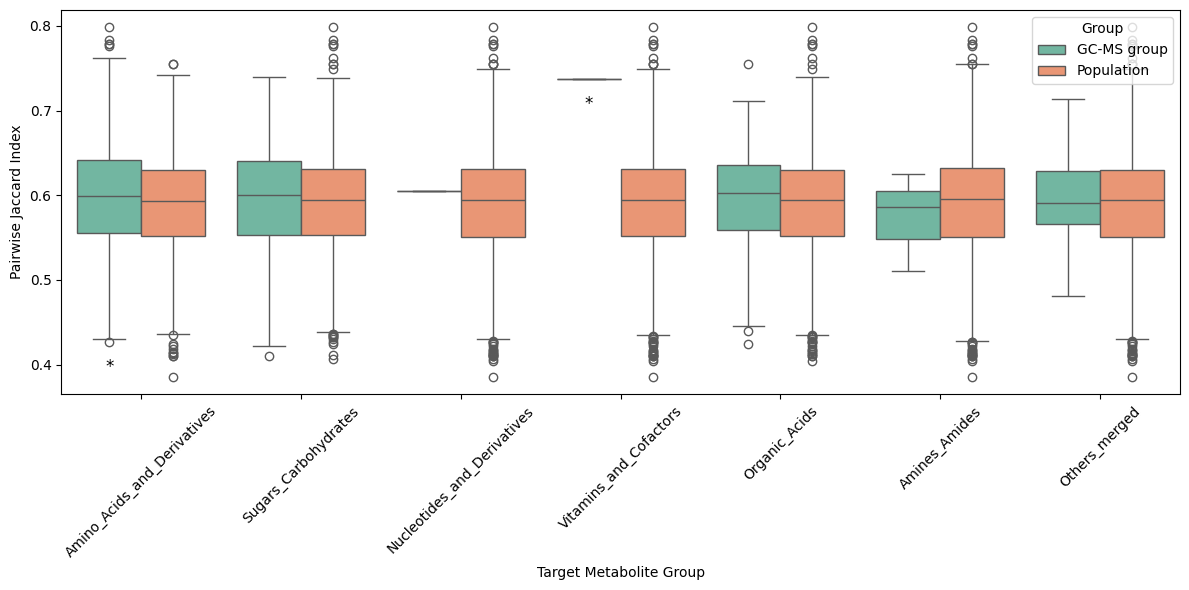

In [56]:

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Category', y='pw_ji', hue='Group', data=plot_gcms, palette='Set2')

# Iterate over the categories to annotate
for i, key in enumerate(groups_gcms.keys()):
    if sign_diff[key]:  # If this group differs significantly
        # This places a star or some marker above the group's boxplot
        # You might need to adjust the y-coordinate calculation according to your data range
        y = plot_gcms[(plot_gcms['Category'] == key) & (plot_gcms['Group'] == 'GC-MS group')]['pw_ji'].min() - 0.04
        ax.text(i - 0.2, y, '*', color='black', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
ax.set_xlabel('Target Metabolite Group')
ax.set_ylabel('Pairwise Jaccard Index')
#plt.title('Comparison of Test Groups and Populations')
plt.tight_layout()
plt.show()


### lcms boxplot

In [57]:
### PREPARE DATA FOR PLOTTING ###
data = []
# each category in the groups
for key in groups_lcms.keys():
    for sub_key, value in groups_lcms[key].items():
        data.append({'Category': key, 'pw_ji': value, 'Group': 'LC-MS group'})
    for sub_key, value in pop_ji_lcms[key].items():
        data.append({'Category': key, 'pw_ji': value, 'Group': 'Population'})
plot_lcms = pd.DataFrame(data) 

# to numeric flaot, int
plot_lcms['pw_ji'] = pd.to_numeric(plot_lcms['pw_ji'])
## CREATING BOOLEAN DICT FOR SIGNIFICANT GROUPS, KS-TEST ABOVE
sign_diff = {key: False for key in groups_lcms.keys()}
#lcks[lcks['p_fdr_bh']< 0.05].index.tolist() significant groups
for group in lcks[lcks['p_fdr_bh']< 0.05].index.tolist() :
    sign_diff[group] = True

sign_diff

{'Amino_Acids_and_Derivatives': False,
 'Quinic_Acid_Derivatives': False,
 'Phenolic_Compounds': True,
 'Sugars_and_Sugar_Derivatives': False,
 'Nucleotides_and_Derivatives': False,
 'Terpenes_and_Triterpenes': False,
 'Saponins': True,
 'Other_merged': False,
 'unidentified': True}

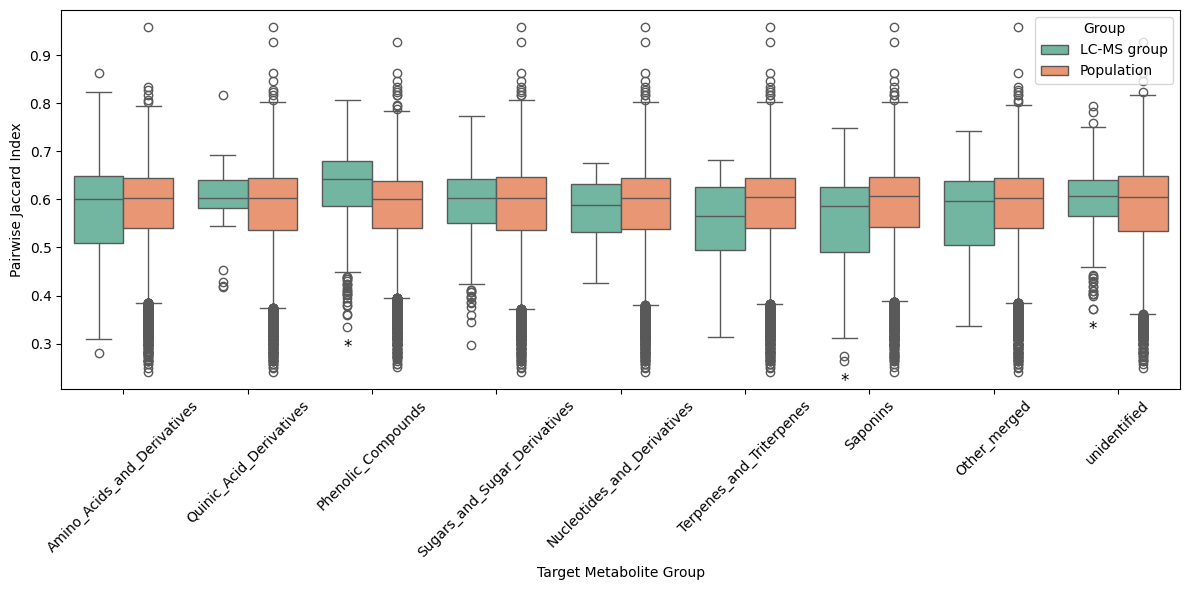

In [58]:

plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Category', y='pw_ji', hue='Group', data=plot_lcms, palette='Set2')

# Iterate over the categories to annotate
for i, key in enumerate(groups_lcms.keys()):
    if sign_diff[key]:  # If this group differs significantly
        # This places a star or some marker above the group's boxplot
        # You might need to adjust the y-coordinate calculation according to your data range
        y = plot_lcms[(plot_lcms['Category'] == key) & (plot_lcms['Group'] == 'LC-MS group')]['pw_ji'].min() - 0.06
        ax.text(i - 0.2, y, '*', color='black', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
ax.set_xlabel('Target Metabolite Group')
ax.set_ylabel('Pairwise Jaccard Index')
#plt.title('Comparison of Test Groups and Populations')
plt.tight_layout()
plt.show()
